# Plotting in R with `ggplot2` and friends


 __email__: christina@lifebit.ai
 
(or create a new issue in the workshop's github repo [here](https://github.com/lifebit-ai/jax-jupyter/issues))

## Loading libraries and installing dependencies:

In [1]:
install.packages("ggpubr")
install.packages("githubinstall")
install.packages("DT")
install.packages("skimr")
install.packages("BiocManager")
BiocManager::install("EnhancedVolcano")
#BiocManager::install("DESeq2")
#BiocManager::install("airway")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.1 (2019-07-05)
Installing package(s) 'EnhancedVolcano'
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Old packages: 'backports', 'callr', 'curl', 'data.table', 'devtools', 'digest',
  'ellipsis', 'forecast', 'ggplot2', 'haven', 'hexbin', 'hms', 'htmltools',
  'htmlwidgets', 'httpuv', 'KernSmooth', 'knitr', 'later', 'lava', 'mgcv',
  'nlme', 'nycflights13', 'pkgbuild', 'pkgconfig', 'prodlim', 'promises',
  'purrr', 'quadprog', 'R6', 'Rcpp', 'RcppArmadillo', 'recipes', 'rlang',
  'rmarkdown', 'roxygen2', 'rvest', 'scales

In [2]:
library(ggplot2)
library(ggpubr)
library(githubinstall)
library(DT)
library(skimr)
library(BiocManager)
library(EnhancedVolcano)
#library(airway)
#library(DESeq2)

Loading required package: magrittr
Bioconductor version 3.10 (BiocManager 1.30.10), ?BiocManager::install for help
Loading required package: ggrepel


# Searching for packages relevant to `ggplot2`

The following brief tutorial will guide you through the functions of the `githubinstall` R package, a package to easily query GitHub and find all relevant R packages to your selected query search term of interest. The function `gh_search_packages()` returns the list of R packages on GitHub that the titles contains a given `#keyword` .

For example, if you want to search packages that are relevant to __"ggplot2"__, run the following:

In [3]:
#  Search Packages by a Keyword, in this example we search for "ggplot2" 
# install.packages("githubinstall") || found here: hoxo-m.github.io/githubinstall/

keyword <- "ggplot2"

library(githubinstall)

pckges    <- gh_search_packages(keyword)
skimr::skim(pckges)

Warning message in fread(download_url, sep = "\t", header = FALSE, stringsAsFactors = FALSE, :
“Found and resolved improper quoting out-of-sample. First healed line 4848: <<Puriney	honfleuR	"Evening, honfleuR" by Seurat>>. If the fields are not quoted (e.g. field separator does not appear within any field), try quote="" to avoid this warning.”

── Data Summary ────────────────────────
                           Values
Name                       pckges
Number of rows             227   
Number of columns          3     
_______________________          
Column type frequency:           
  character                3     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────



### Let's inspect what packages we retrieved related to `ggplot2`

In [4]:
DT::datatable(pckges)

HTML widgets cannot be represented in plain text (need html)

Above we can see how many packages were found that contain the search term in their description. The `gh_search_packages` function returns 3 arguments for each package:<br>
- ```username:      ```account name of package developer on GitHub
- ```package_name:  ```the name of the package that you can use as argument in thw `install.packages()` function
- ```title:        ``` the description of the package



# 🤔 Mmm, wouldn't it be nice if the package name was actually a `<clickable>`  link..

Let's try to add some interactivity to our retrieved table and convert the package names to clickable links that will take us to the github repo of the packages.

### Reconstructing the R package GitHub repo url for clickable links
    
We will recontruct the string with the above pattern for all found packages, and add the html tag for redirecting
so the pattern to recreate should look like this:


In [5]:
# Mutate the package names to create clickable links:

pckges$package_name <- paste0("<a href='https://github.com/",
                             pckges$username, 
                             "/",
                             pckges$package_name, 
                             "'/",
                             "target='blank",
                             "'>",
                             pckges$package_name, 
                             "</a>")

## Updated datatable with clickable links!

Now we can inspect the packages that seem interesting by clicking the link. This will take us to the respective repository in GitHub.

In [6]:
DT::datatable(pckges[,-1],      # the -1 to omit the username in the output table
              escape = FALSE   # this is required for the url
             )

HTML widgets cannot be represented in plain text (need html)

# Let's search for `ggpubr` R package in our data table above 👆
<br>


![](../img/ggpubr.png)

This is one of our favorite R packages to create beautiful publication-ready plots. Before starting we will need to get some data. 

# Getting RNAseq data to test our plots

We will utilise the  data from from [Bioconductor's Rnaseq Workflow](http://master.bioconductor.org/packages/release/workflows/vignettes/rnaseqGene/inst/doc/rnaseqGene.html). We will see this dataset again a little later from another R package  for plotting. For retrieving the results of the differential expression analysis, we will follow the tutorial (from Section 3.1) of the RNA-seq workflow. Specifically, we will load the [airway](https://bioconductor.org/packages/release/data/experiment/html/airway.html) data, where different airway smooth muscle cells were treated with dexamethasone. We will use this dataset to explore different visualisations for presenting differential abundance. While the data we will use are from an RNAseq experiment, we can utilise the same visualisations for other omics data such as proteomics or metabolomics after the relevant preprocessing.

## Loading and inspecting the `{airway}` differential analysis results

To save some waiting time we will load the precomputed results from the comparison described above, our set contrast for treated and untreated with dexamethasone muscle cells. You can reproduce this table by running the following code:


```r
# this code snippet is written in markdown, enclosed in ``` and will not be executed
# to run paste in a code cell

library(magrittr)
library('DESeq2')
library(airway)

data('airway')

levels(airway$dex)
airway$dex %<>% relevel('untrt')
levels(airway$dex)

dds <- DESeqDataSet(airway, design = ~ cell + dex)
dds <- DESeq(dds, betaPrior=FALSE)

res1 <- results(dds,contrast = c('dex','trt','untrt'))
subsampled_results <- res1[1:5000,]
subsampled_results$feature <- subsampled_results@rownames
                          
# Subsample and save an object to an Rds and a csv file
saveRDS(subsample_results, file = "deseq2_5k.rds")
loaded_results_RDS <- readRDS(file = "deseq2_5k.rds")
data.table::fwrite(as.data.frame(subsampled_results),
                   col.names = TRUE, 
                   row.names = FALSE,
                   file = "../data/2-plotting-in-R/deseq2_5k.csv", 
                   sep  =',')


```


In [7]:
results <- data.table::fread(file = "../data/2-plotting-in-R/deseq2_5k.csv")

# Let's inspect the results 
We quickly notice the log2FoldChange and adjusted pValue. In a differential expression experiment, these two metrics give us a quick overview of the most interesting biological

In [8]:
head(results)

baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,feature
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
708.6021697,-0.38125389,0.1006544,-3.7877507,0.0001520173,0.001283638,ENSG00000000003
0.0000000,NA,NA,NA,NA,NA,ENSG00000000005
520.2979006,0.20681272,0.1122187,1.8429438,0.0653372101,0.196545841,ENSG00000000419
237.1630368,0.03792059,0.1434447,0.2643568,0.7915049630,0.911458001,ENSG00000000457
57.9326331,-0.08816770,0.2871420,-0.3070526,0.7588033355,0.895034450,ENSG00000000460
0.3180984,-1.37823397,3.4998753,-0.3937952,0.6937322727,NA,ENSG00000000938


# Easy volcano plots with `{EnhancedVolcano}` R package 📦

The `{EnhancedVolcano}` R package 📦 has been developed by [Kevin Blighe](https://www.biostars.org/u/41557/) - the name might seem familiar as you might have come across it several times if you find yourselves in [Biostars](https://www.biostars.org/u/41557/) frequently. Kevin Blighe, is not merely a very active Biostars users but also the admin! The `{EnhancedVolcano}` R package, is one very useful R package, as it provides great flexibility and ease for creating publication ready Volcano plots. We will be following the package `vignette`, which can be found [here](https://github.com/kevinblighe/EnhancedVolcano), in the respective GitHub repository.Let's see the package in action!

In [10]:
library(EnhancedVolcano)


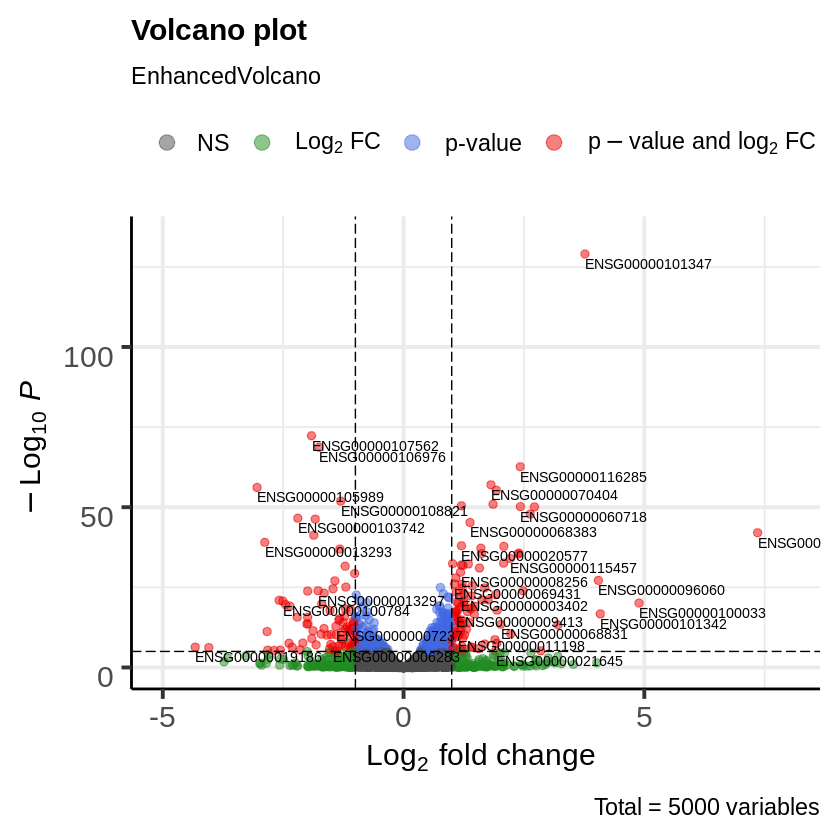

In [11]:
# A minimal function call, for a complete plot

gg<- EnhancedVolcano(toptable = results, 
                    lab = results$feature,
                    x = 'log2FoldChange',
                    y = 'pvalue',
                    xlim = c(-5, 8))

gg

In [12]:
install.packages('plotly') ; library(plotly)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout



# Let's customise the 🌋 plot a bit more

- Modify cut-offs for log2FC and P value
- specify title 
- adjust point and label size


In [ ]:
gg<-   EnhancedVolcano::EnhancedVolcano( results,    
                        col=c('grey', 'grey', 'orange', 'forestgreen'),

                        lab = results$feature,
                        x = 'log2FoldChange',
                        y = 'pvalue',
                        xlim = c(-6, 6),

                        title = 'Differential abundance (untreated with respect to treated cells)',  
                        titleLabSize = 12,
                       
                        subtitle = '{EnhancedVolcano} for JAX',
                        subtitleLabSize = 10,
                       
                        caption = "Treated vs Untreated with dexamethasone",
                        captionLabSize = 10,
                       
                        pCutoff = 10e-16,
                        FCcutoff = 1.2,
                        pointSize = 1.0,
                        labSize = 3.0)

gg